### Problem Statement
A project with an Ecommerce company sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want. The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They have asked to help them figure it out.

Dataset Details

We worked with the Ecommerce Customers csv file from the company. It has Customer info, such as Email, Address, and their color Avatar. Then it also has numerical value columns:

### •	Avg. Session Length: Average session of in-store style advice sessions in minutes.
### •	Time on App: Average time spent on App in minutes
### •	Time on Website: Average time spent on Website in minutes
### •	Length of Membership: How many years the customer has been a member.
### •	Yearly Amount Spent: The total amount the customer is spending in dollars.
Business Objective:  Interpret which variables are contributing towards the more annual income prediction and build a prediction model


Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from ydata_profiling import ProfileReport

Reading Dataset

In [2]:
data = pd.read_csv('Ecommerce_Customers.csv')
data

Email  \
0        mstephenson@fernandez.com   
1                hduke@hotmail.com   
2                 pallen@yahoo.com   
3          riverarebecca@gmail.com   
4    mstephens@davidson-herman.com   
..                             ...   
495   lewisjessica@craig-evans.com   
496            katrina56@gmail.com   
497             dale88@hotmail.com   
498            cwilson@hotmail.com   
499      hannahwilson@davidson.com   

                                               Address            Avatar  \
0           835 Frank TunnelWrightmouth, MI 82180-9605            Violet   
1         4547 Archer CommonDiazchester, CA 06566-8576         DarkGreen   
2    24645 Valerie Unions Suite 582Cobbborough, DC ...            Bisque   
3       1414 David ThroughwayPort Jason, OH 22070-1220       SaddleBrown   
4    14023 Rodriguez PassagePort Jacobville, PR 372...  MediumAquaMarine   
..                                                 ...               ...   
495  4483 Jones Motorway Suite 872Lake Jamiefurt, U...               Tan   
496    172 Owen Divide Suite 497West Richard, CA 19320     PaleVioletRed   
497  0787 Andrews Ranch Apt. 633South Chadburgh, TN...          Cornsilk   
498  680 Jennifer Lodge Apt. 808Brendachester, TX 0...              Teal   
499  49791 Rachel Heights Apt. 898East Drewborough,...       DarkMagenta   

     Avg Session Length  Time on App  Time on Website  Length of Membership  \
0             34.497268    12.655651        39.577668              4.082621   
1             31.926272    11.109461        37.268959              2.664034   
2             33.000915    11.330278        37.110597              4.104543   
3             34.305557    13.717514        36.721283              3.120179   
4             33.330673    12.795189        37.536653              4.446308   
..                  ...          ...              ...                   ...   
495           33.237660    13.566160        36.417985              3.746573   
496           34.702529    11.695736        37.190268              3.576526   
497           32.646777    11.499409        38.332576              4.958264   
498           33.322501    12.391423        36.840086              2.336485   
499           33.715981    12.418808        35.771016              2.735160   

     Yearly Amount Spent  
0             587.951054  
1             392.204933  
2             487.547505  
3             581.852344  
4             599.406092  
..                   ...  
495           573.847438  
496           529.049004  
497           551.620145  
498           456.469510  
499           497.778642  

[500 rows x 8 columns]

In [3]:
data.shape

(500, 8)

In our dataset Email,Address and avatar columns they don’t have any predictive power to predict the dependent variable.

In [4]:
df = data.iloc[:,3:]
df.head()

Avg Session Length  Time on App  Time on Website  Length of Membership  \
0           34.497268    12.655651        39.577668              4.082621   
1           31.926272    11.109461        37.268959              2.664034   
2           33.000915    11.330278        37.110597              4.104543   
3           34.305557    13.717514        36.721283              3.120179   
4           33.330673    12.795189        37.536653              4.446308   

   Yearly Amount Spent  
0           587.951054  
1           392.204933  
2           487.547505  
3           581.852344  
4           599.406092

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Avg Session Length    500 non-null    float64
 1   Time on App           500 non-null    float64
 2   Time on Website       500 non-null    float64
 3   Length of Membership  500 non-null    float64
 4   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


In [6]:
df.isnull().sum()

Avg Session Length      0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

<Axes: >

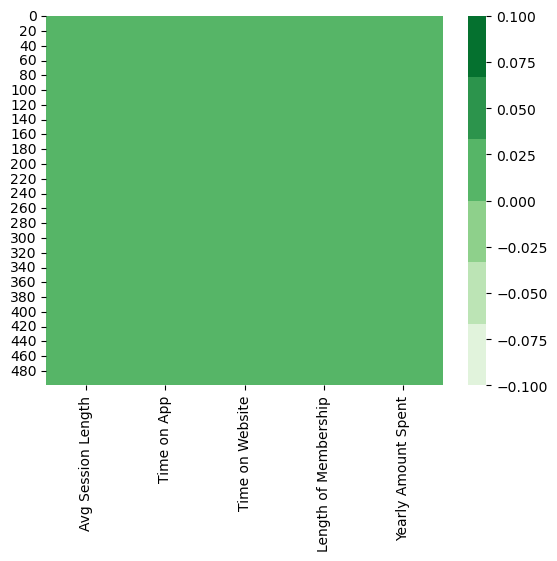

In [7]:
# creating a colormap 
colormap = sns.color_palette("Greens") 
sns.heatmap(df.isnull(),cmap=colormap)

In [8]:
#No null values in data

In [9]:
df[df.duplicated()]

Empty DataFrame
Columns: [Avg Session Length, Time on App, Time on Website, Length of Membership, Yearly Amount Spent]
Index: []

In [10]:
# No duplicated rows 

In [11]:
df.describe().T

count        mean        std         min         25%  \
Avg Session Length    500.0   33.053194   0.992563   29.532429   32.341822   
Time on App           500.0   12.052488   0.994216    8.508152   11.388153   
Time on Website       500.0   37.060445   1.010489   33.913847   36.349257   
Length of Membership  500.0    3.533462   0.999278    0.269901    2.930450   
Yearly Amount Spent   500.0  499.314038  79.314782  256.670582  445.038277   

                             50%         75%         max  
Avg Session Length     33.082008   33.711985   36.139662  
Time on App            11.983231   12.753850   15.126994  
Time on Website        37.069367   37.716432   40.005182  
Length of Membership    3.533975    4.126502    6.922689  
Yearly Amount Spent   498.887875  549.313828  765.518462

In [12]:
df.head()

Avg Session Length  Time on App  Time on Website  Length of Membership  \
0           34.497268    12.655651        39.577668              4.082621   
1           31.926272    11.109461        37.268959              2.664034   
2           33.000915    11.330278        37.110597              4.104543   
3           34.305557    13.717514        36.721283              3.120179   
4           33.330673    12.795189        37.536653              4.446308   

   Yearly Amount Spent  
0           587.951054  
1           392.204933  
2           487.547505  
3           581.852344  
4           599.406092

# EDA Univariate Analysis

Avg Session Length


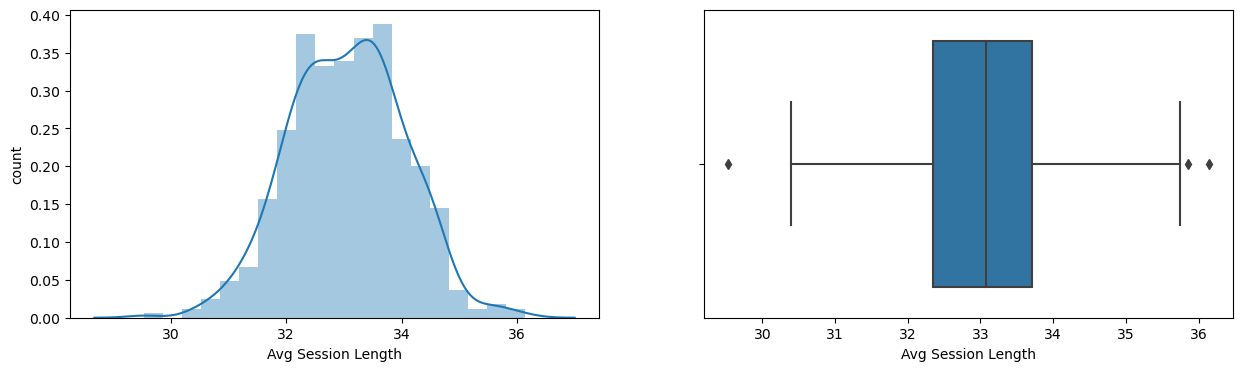

Time on App


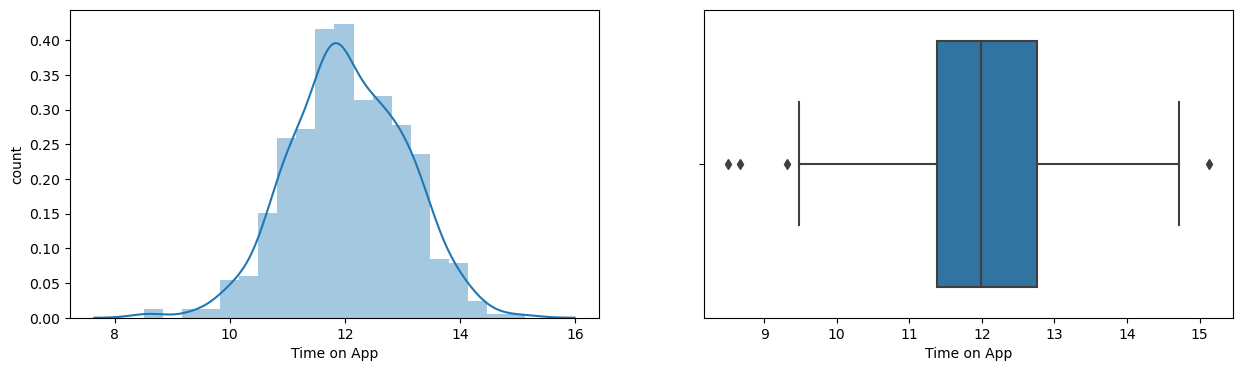

Time on Website


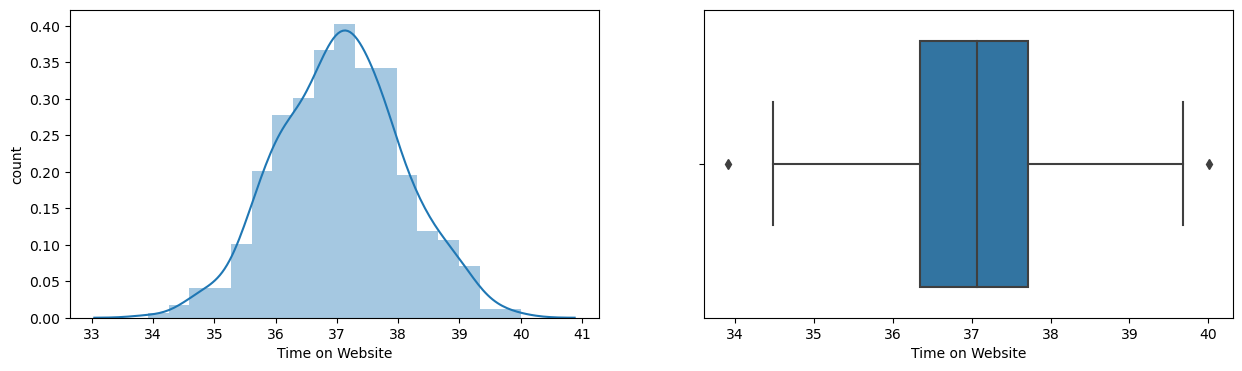

Length of Membership


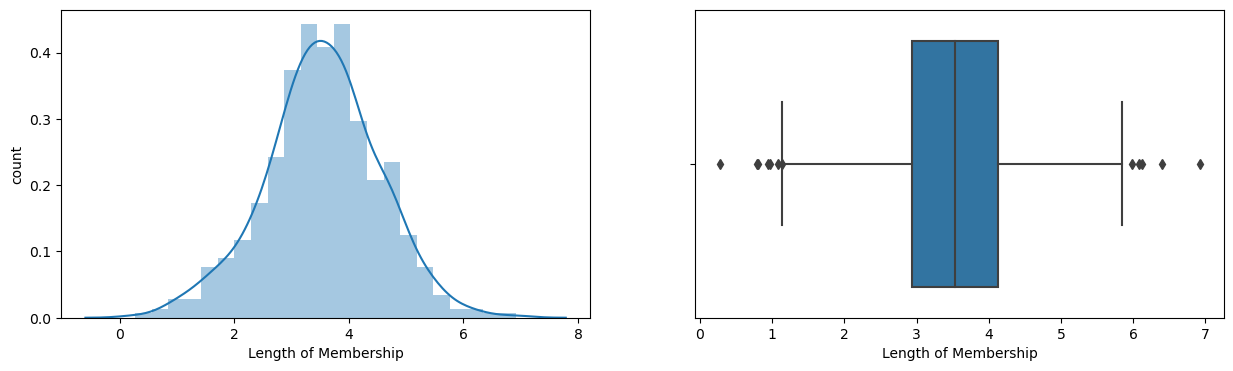

Yearly Amount Spent


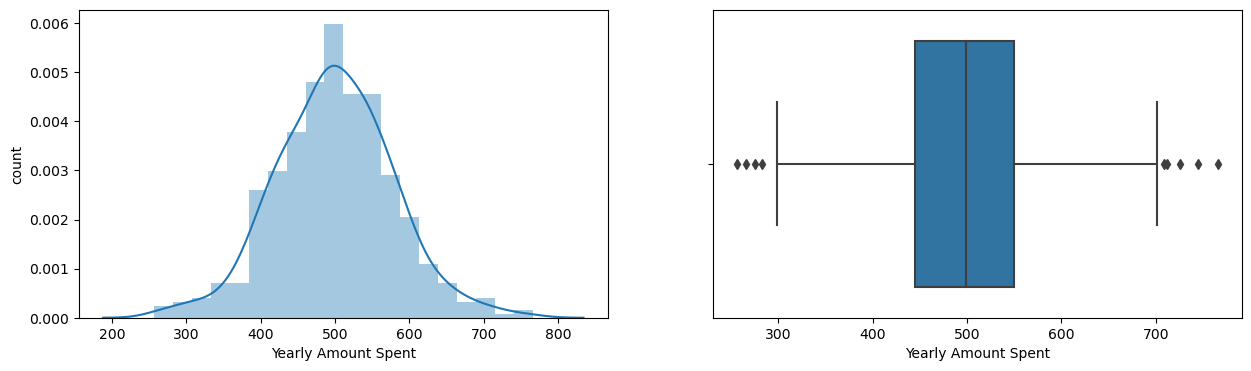

In [13]:
for col in df:
    print(col)
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    sns.distplot(df[col])
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

# EDA Bivariate Analysis

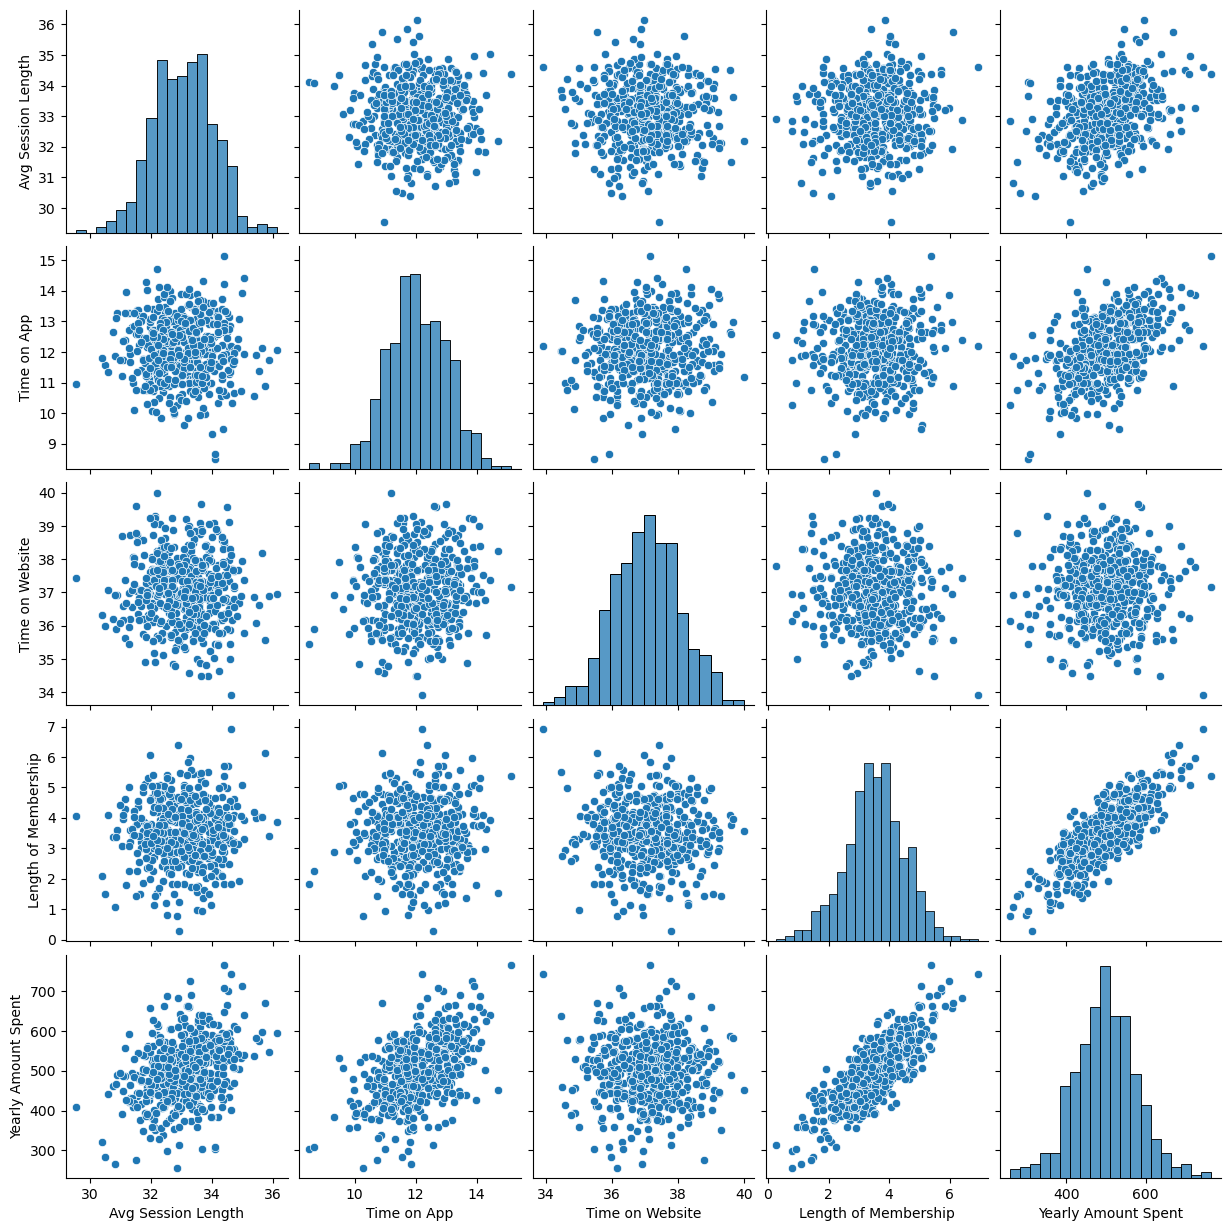

In [14]:
sns.pairplot(data=df)

In [15]:
df.corr()

Avg Session Length  Time on App  Time on Website  \
Avg Session Length              1.000000    -0.027826        -0.034987   
Time on App                    -0.027826     1.000000         0.082388   
Time on Website                -0.034987     0.082388         1.000000   
Length of Membership            0.060247     0.029143        -0.047582   
Yearly Amount Spent             0.355088     0.499328        -0.002641   

                      Length of Membership  Yearly Amount Spent  
Avg Session Length                0.060247             0.355088  
Time on App                       0.029143             0.499328  
Time on Website                  -0.047582            -0.002641  
Length of Membership              1.000000             0.809084  
Yearly Amount Spent               0.809084             1.000000

<Axes: >

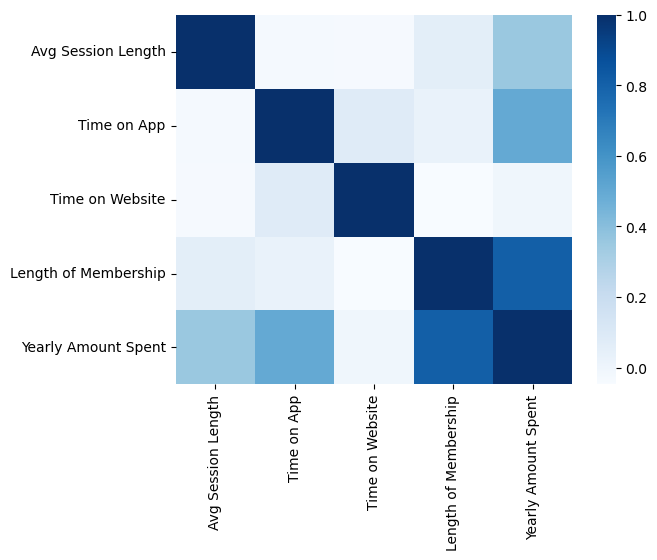

In [16]:
sns.heatmap(df.corr(),cmap='Blues')

Length of Membership is highly correlated to Yearly Amount Spend

In [17]:
#!pip install ydata-profiling

In [18]:

df1 = df.rename(columns={'Avg Session Length':'ASL','Time on App':'TOA','Time on Website':'TOW','Length of Membership':'LOM','Yearly Amount Spent'
:'YAS'})
df1.head()

ASL        TOA        TOW       LOM         YAS
0  34.497268  12.655651  39.577668  4.082621  587.951054
1  31.926272  11.109461  37.268959  2.664034  392.204933
2  33.000915  11.330278  37.110597  4.104543  487.547505
3  34.305557  13.717514  36.721283  3.120179  581.852344
4  33.330673  12.795189  37.536653  4.446308  599.406092

In [19]:
from scipy.stats.mstats import winsorize


In [20]:
win_asl = winsorize(df1['ASL'],(0.01,0.01))
win_toa = winsorize(df1['TOA'],(0.01,0.01))
win_tow = winsorize(df1['TOW'],(0.01,0.01))
win_lom = winsorize(df1['LOM'],(0.02,0.01))
win_yas = winsorize(df1['YAS'],(0.01,0.01))

In [21]:
df2 = pd.DataFrame()
df2['win_asl'] = pd.DataFrame(win_asl)
df2['win_toa'] = pd.DataFrame(win_toa)
df2['win_tow'] = pd.DataFrame(win_tow)
df2['win_lom'] = pd.DataFrame(win_lom)
df2['win_yas'] = pd.DataFrame(win_yas)
df2


win_asl    win_toa    win_tow   win_lom     win_yas
0    34.497268  12.655651  39.252931  4.082621  587.951054
1    31.926272  11.109461  37.268959  2.664034  392.204933
2    33.000915  11.330278  37.110597  4.104543  487.547505
3    34.305557  13.717514  36.721283  3.120179  581.852344
4    33.330673  12.795189  37.536653  4.446308  599.406092
..         ...        ...        ...       ...         ...
495  33.237660  13.566160  36.417985  3.746573  573.847438
496  34.702529  11.695736  37.190268  3.576526  529.049004
497  32.646777  11.499409  38.332576  4.958264  551.620145
498  33.322501  12.391423  36.840086  2.336485  456.469510
499  33.715981  12.418808  35.771016  2.735160  497.778642

[500 rows x 5 columns]

win_asl


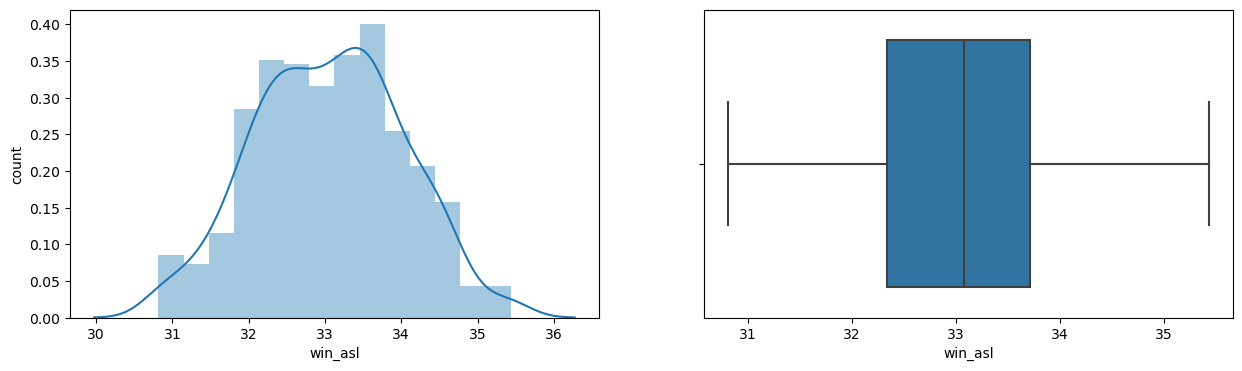

win_toa


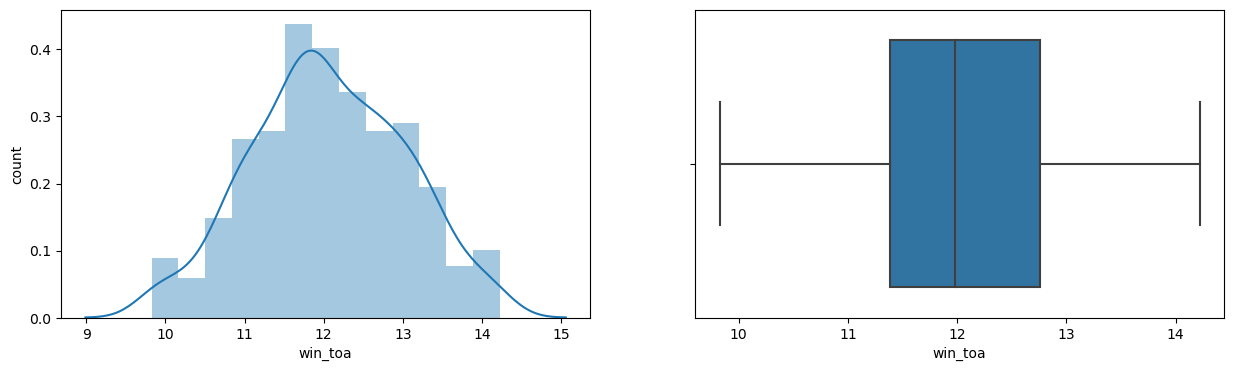

win_tow


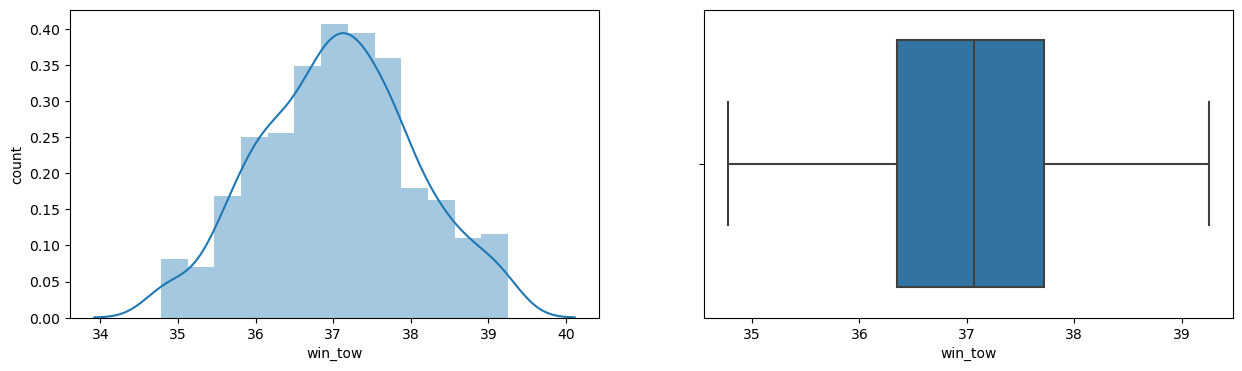

win_lom


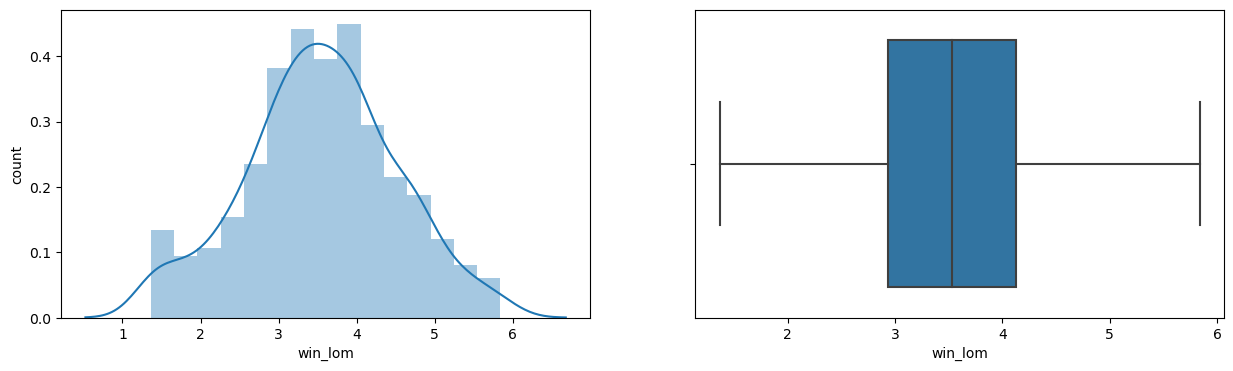

win_yas


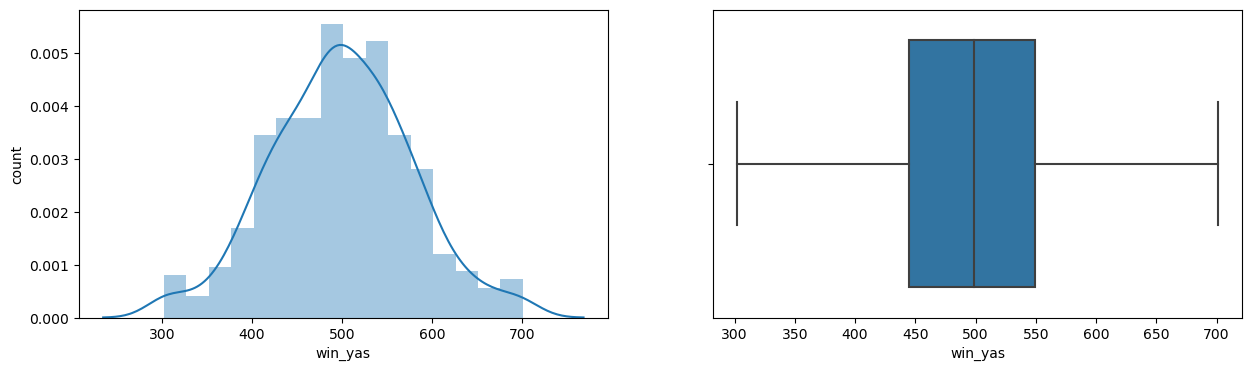

In [22]:
for col in df2:
    print(col)
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    sns.distplot(df2[col])
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df2[col])
    plt.show()

Text(0.5, 0, 'Winsorized')

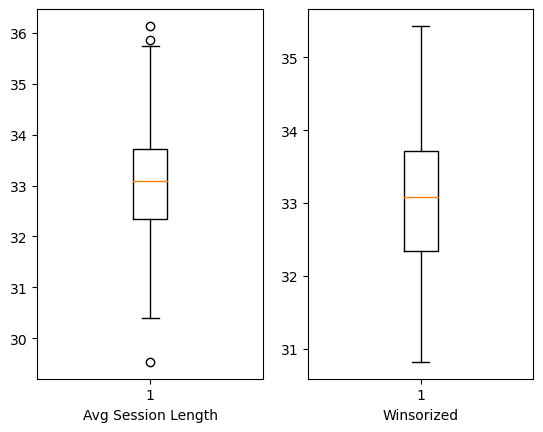

In [23]:
plt.subplot(1,2,1)
plt.boxplot(df['Avg Session Length'])
plt.xlabel('Avg Session Length')
plt.subplot(1,2,2)
plt.boxplot(win_asl)
plt.xlabel('Winsorized')

Text(0.5, 0, 'Winsorized')

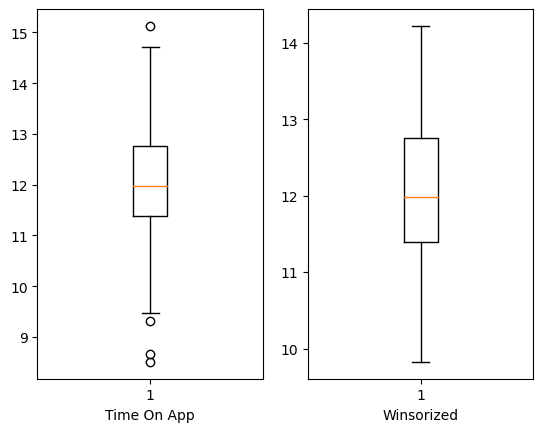

In [24]:
plt.subplot(1,2,1)
plt.boxplot(df['Time on App'])
plt.xlabel('Time On App')
plt.subplot(1,2,2)
plt.boxplot(win_toa)
plt.xlabel('Winsorized')

Text(0.5, 0, 'Winsorized')

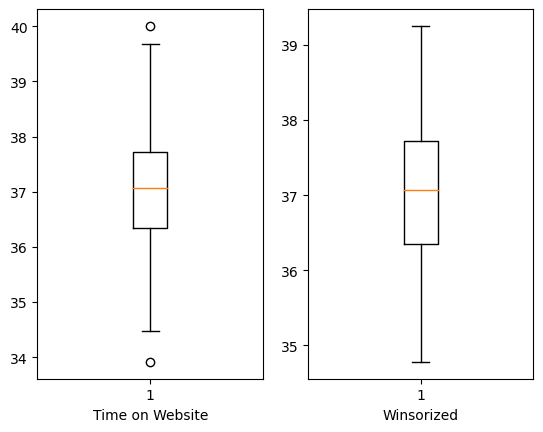

In [25]:
plt.subplot(1,2,1)
plt.boxplot(df['Time on Website'])
plt.xlabel('Time on Website')
plt.subplot(1,2,2)
plt.boxplot(win_tow)
plt.xlabel('Winsorized')

Text(0.5, 0, 'Winsorized')

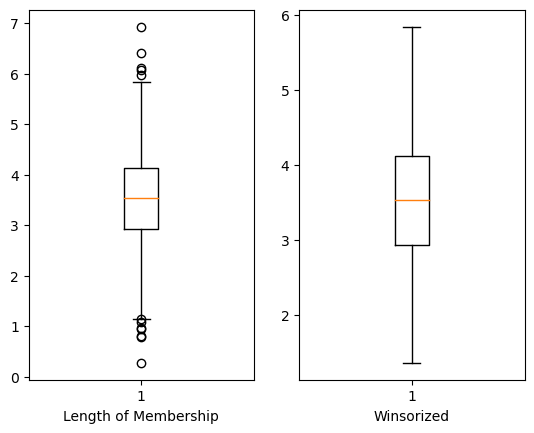

In [26]:
plt.subplot(1,2,1)
plt.boxplot(df['Length of Membership'])
plt.xlabel('Length of Membership')
plt.subplot(1,2,2)
plt.boxplot(win_lom)
plt.xlabel('Winsorized')

Text(0.5, 0, 'Winsorized')

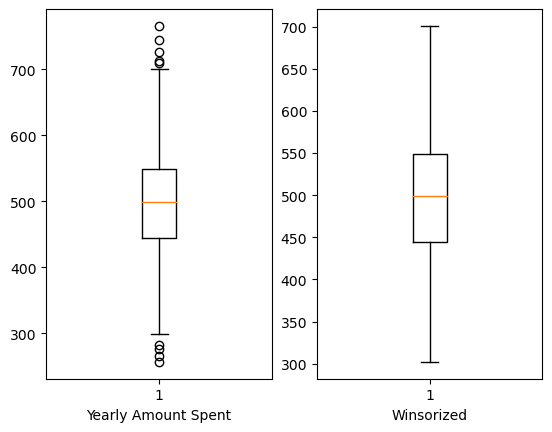

In [27]:
plt.subplot(1,2,1)
plt.boxplot(df['Yearly Amount Spent'])
plt.xlabel('Yearly Amount Spent')
plt.subplot(1,2,2)
plt.boxplot(win_yas)
plt.xlabel('Winsorized')

In [28]:
df2

win_asl    win_toa    win_tow   win_lom     win_yas
0    34.497268  12.655651  39.252931  4.082621  587.951054
1    31.926272  11.109461  37.268959  2.664034  392.204933
2    33.000915  11.330278  37.110597  4.104543  487.547505
3    34.305557  13.717514  36.721283  3.120179  581.852344
4    33.330673  12.795189  37.536653  4.446308  599.406092
..         ...        ...        ...       ...         ...
495  33.237660  13.566160  36.417985  3.746573  573.847438
496  34.702529  11.695736  37.190268  3.576526  529.049004
497  32.646777  11.499409  38.332576  4.958264  551.620145
498  33.322501  12.391423  36.840086  2.336485  456.469510
499  33.715981  12.418808  35.771016  2.735160  497.778642

[500 rows x 5 columns]

In [29]:
X = df1.iloc[:,:-1]
Y = df1['YAS']

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.22,random_state=101)

In [31]:
X_test

ASL        TOA        TOW       LOM
18   32.187812  14.715388  38.244115  1.516576
361  32.077590  10.347877  39.045156  3.434560
104  31.389585  10.994224  38.074452  3.428860
4    33.330673  12.795189  37.536653  4.446308
156  32.294642  12.443048  37.327848  5.084861
..         ...        ...        ...       ...
55   33.925297  11.588655  35.252242  3.392050
261  32.550527  13.041245  36.655208  3.456234
57   34.301870  10.568295  36.173126  3.315225
352  34.935605  10.728419  36.881192  4.048510
360  33.228772  12.685394  36.048986  2.139403

[110 rows x 4 columns]

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [33]:
X_train_scaled

array([[-0.14251816, -0.50501519, -0.1807639 ,  1.14014303],
       [-1.30270318, -0.27028626, -0.30534201, -1.71123611],
       [-0.30626415, -1.96269457, -2.26020014, -0.24231793],
       ...,
       [-1.19747784,  0.465894  ,  0.36993627, -0.56149447],
       [ 0.83265525, -0.44777334,  0.02269261,  0.19163465],
       [-0.83936045, -0.65420908,  1.15232941,  1.3084809 ]])

# Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
linear_reg = lr.fit(X_train,Y_train)
pred_test = linear_reg.predict(X_test)
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,r2_score
print ('r2_score of Linear Regression',r2_score(Y_test,pred_test))
print ('Mean Squared Error of Linear Regression',mean_squared_error(Y_test,pred_test))
print ('MAPE of Linear Regression',mean_absolute_percentage_error(Y_test,pred_test))


r2_score of Linear Regression 0.9879983052714
Mean Squared Error of Linear Regression 89.30619847753705
MAPE of Linear Regression 0.015342923750977563


# Ridge Regression

In [35]:
from sklearn.linear_model import Ridge
rr = Ridge()
ridge_reg = rr.fit(X_train,Y_train)
pred_test = ridge_reg.predict(X_test)
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error
print ('r2_score of Ridge Regression',r2_score(Y_test,pred_test))
print ('Mean Squared Error of Ridge Regression',mean_squared_error(Y_test,pred_test))
print ('MAPE of Ridge Regression',mean_absolute_percentage_error(Y_test,pred_test))

r2_score of Ridge Regression 0.9879794237263607
Mean Squared Error of Ridge Regression 89.44669855248219
MAPE of Ridge Regression 0.015321146976696245


# Lasso Regression

In [36]:
from sklearn.linear_model import Lasso
l = Lasso()
lasso_reg = l.fit(X_train,Y_train)
pred_train = lasso_reg.predict(X_train)
pred_test = lasso_reg.predict(X_test)
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,r2_score
print ('r2_score of Lasso Regression',r2_score(Y_test,pred_test))
print ('Mean Squared Error of Lasso Regression',mean_squared_error(Y_test,pred_test))
print ('MAPE of Lasso Regression',mean_absolute_percentage_error(Y_test,pred_test))

r2_score of Lasso Regression 0.9875961467284491
Mean Squared Error of Lasso Regression 92.29871340716817
MAPE of Lasso Regression 0.015908510087515447


# Decision Tree Regression

In [37]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt_reg = dt.fit(X_train,Y_train)
pred_test = dt_reg.predict(X_test)
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,r2_score
print ('r2_score of DT Regression',r2_score(Y_test,pred_test))
print ('Mean Squared Error of Decision Tree Regression',mean_squared_error(Y_test,pred_test))
print ('MAPE of Decision Tree Regression',mean_absolute_percentage_error(Y_test,pred_test))

r2_score of DT Regression 0.8960655070489006
Mean Squared Error of Decision Tree Regression 773.3903141223927
MAPE of Decision Tree Regression 0.04474667862361879


# Random Forest

In [38]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf_reg = rf.fit(X_train,Y_train)
pred_test = rf_reg.predict(X_test)
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,r2_score
print ('r2_score of Random Forest Regression',r2_score(Y_test,pred_test))
print ('Mean Squared Error of Random Forest Regression',mean_squared_error(Y_test,pred_test))
print ('MAPE of Random Forest Regression',mean_absolute_percentage_error(Y_test,pred_test))

r2_score of Random Forest Regression 0.937483658319293
Mean Squared Error of Random Forest Regression 465.19237028435816
MAPE of Random Forest Regression 0.030136009948673555


# GradientBoost

In [39]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb_reg = gb.fit(X_train,Y_train)
pred_test = gb_reg.predict(X_test)
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,r2_score
print ('r2_score of Gradient Boost Regression',r2_score(Y_test,pred_test))
print ('Mean Squared Error of Gradient Boost Regression',mean_squared_error(Y_test,pred_test))
print ('MAPE of Gradient Boost Regression',mean_absolute_percentage_error(Y_test,pred_test))

r2_score of Gradient Boost Regression 0.9661397837583845
Mean Squared Error of Gradient Boost Regression 251.95834926212672
MAPE of Gradient Boost Regression 0.023874194321872686


# Support Vector Regression

In [40]:
from sklearn.svm import SVR
sv = SVR()
sv_reg = sv.fit(X_train,Y_train)
pred_test = sv_reg.predict(X_test)
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,r2_score
print ('r2_score of Gradient Boost Regression',r2_score(Y_test,pred_test))
print ('Mean Squared Error of Gradient Boost Regression',mean_squared_error(Y_test,pred_test))
print ('MAPE of Gradient Boost Regression',mean_absolute_percentage_error(Y_test,pred_test))

r2_score of Gradient Boost Regression 0.006236899072846858
Mean Squared Error of Gradient Boost Regression 7394.722723580333
MAPE of Gradient Boost Regression 0.13469557739054322


# XGB

In [41]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb_reg = xgb.fit(X_train,Y_train)
pred_test = xgb_reg.predict(X_test)
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,r2_score
print ('r2_score of Gradient Boost Regression',r2_score(Y_test,pred_test))
print ('Mean Squared Error of Gradient Boost Regression',mean_squared_error(Y_test,pred_test))
print ('MAPE of Gradient Boost Regression',mean_absolute_percentage_error(Y_test,pred_test))

r2_score of Gradient Boost Regression 0.9391905865355437
Mean Squared Error of Gradient Boost Regression 452.4908915753449
MAPE of Gradient Boost Regression 0.032270160570519464


# ANN

In [60]:
# import tensorflow as tf
from keras.layers import Dense
from keras.models import Sequential
model = Sequential()
# Adding the input layer
model.add(Dense(15,input_dim=4,activation='linear'))
model.add(Dense(15,activation='linear'))
model.add(Dense(12,activation='linear'))
#Adding the output layer
model.add(Dense(1,activation='linear'))
#Compiling
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
history=model.fit(X_train_scaled,Y_train, validation_split=0.2,batch_size=50,epochs=250)

Epoch 1/250
7/7 [==============================] - 3s 84ms/step - loss: 252725.6875 - val_loss: 255305.1562
Epoch 2/250
7/7 [==============================] - 0s 20ms/step - loss: 252562.6875 - val_loss: 255149.7500
Epoch 3/250
7/7 [==============================] - 0s 23ms/step - loss: 252409.3906 - val_loss: 255003.5312
Epoch 4/250
7/7 [==============================] - 0s 17ms/step - loss: 252251.0469 - val_loss: 254843.0312
Epoch 5/250
7/7 [==============================] - 0s 18ms/step - loss: 252093.0000 - val_loss: 254655.5938
Epoch 6/250
7/7 [==============================] - 0s 19ms/step - loss: 251901.6875 - val_loss: 254451.3906
Epoch 7/250
7/7 [==============================] - 0s 21ms/step - loss: 251680.6406 - val_loss: 254205.3281
Epoch 8/250
7/7 [==============================] - 0s 22ms/step - loss: 251435.7500 - val_loss: 253913.8438
Epoch 9/250
7/7 [==============================] - 0s 21ms/step - loss: 251138.8906 - val_loss: 253545.6406
Epoch 10/250
7/7 [==========

Epoch 158/250
7/7 [==============================] - 0s 20ms/step - loss: 104.3174 - val_loss: 93.2098
Epoch 159/250
7/7 [==============================] - 0s 18ms/step - loss: 104.1648 - val_loss: 93.5108
Epoch 160/250
7/7 [==============================] - 0s 18ms/step - loss: 103.8227 - val_loss: 93.5606
Epoch 161/250
7/7 [==============================] - 0s 17ms/step - loss: 103.9432 - val_loss: 93.9851
Epoch 162/250
7/7 [==============================] - 0s 20ms/step - loss: 103.9886 - val_loss: 94.1145
Epoch 163/250
7/7 [==============================] - 0s 20ms/step - loss: 103.9511 - val_loss: 94.3310
Epoch 164/250
7/7 [==============================] - 0s 21ms/step - loss: 103.8399 - val_loss: 94.2840
Epoch 165/250
7/7 [==============================] - 0s 18ms/step - loss: 103.7084 - val_loss: 94.1892
Epoch 166/250
7/7 [==============================] - 0s 17ms/step - loss: 103.6708 - val_loss: 94.0544
Epoch 167/250
7/7 [==============================] - 0s 17ms/step - loss:

In [61]:
loss = model.evaluate(X_test_scaled, Y_test)

print("Test Loss:", loss)

4/4 [==============================] - 0s 6ms/step - loss: 88.6607
Test Loss: 88.6606674194336


In [62]:
y_pred_ann = model.predict(X_test_scaled)
print('R2_score of Neural Network',r2_score(Y_test,y_pred_ann))

4/4 [==============================] - 0s 5ms/step
R2_score of Neural Network 0.9880850556498268


In [63]:
print('Mean Squared Error of Neural Network',mean_squared_error(Y_test,y_pred_ann))

Mean Squared Error of Neural Network 88.66067743330201


In [64]:
y_pred_ann = y_pred_ann.reshape(-1)
y_pred_ann

array([456.68515, 401.81015, 408.72263, 592.5483 , 591.36395, 549.49066,
       579.0296 , 717.55615, 473.11542, 546.7692 , 336.40686, 500.5428 ,
       553.9177 , 408.5987 , 768.5214 , 546.6837 , 695.1943 , 507.70825,
       574.111  , 574.6272 , 397.328  , 555.5776 , 457.5794 , 482.76758,
       560.2477 , 411.7909 , 532.8449 , 376.74158, 535.79224, 447.51605,
       597.0749 , 668.8118 , 512.04333, 573.74835, 505.22342, 565.8269 ,
       459.88528, 449.4343 , 422.19098, 456.6682 , 599.05426, 449.4089 ,
       616.80273, 512.30695, 504.10367, 516.6364 , 569.0982 , 552.4814 ,
       355.1288 , 465.16724, 481.5145 , 534.52325, 253.69928, 505.42227,
       519.9135 , 312.92462, 502.28683, 385.7543 , 473.06003, 432.23065,
       540.63934, 590.953  , 755.37976, 559.5799 , 524.45013, 431.34763,
       424.50717, 518.5632 , 643.78424, 481.47086, 550.05975, 379.68723,
       555.9049 , 402.38116, 472.32947, 502.34296, 473.39145, 456.1754 ,
       555.3542 , 704.94806, 535.3527 , 621.00824, 

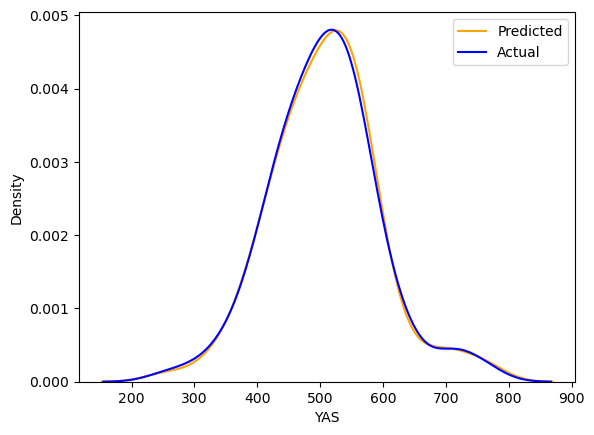

In [65]:
sns.distplot(y_pred_ann,hist=False,color='orange',label='Predicted')
sns.distplot(Y_test,hist=False,color='blue',label='Actual')
plt.legend()
plt.show()

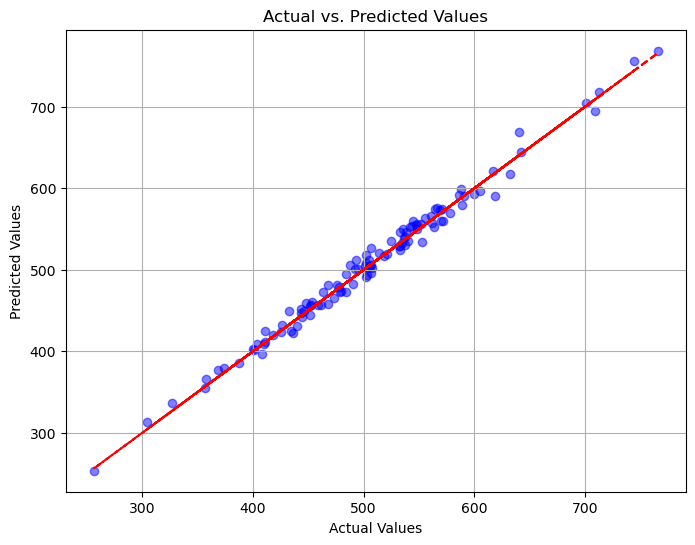

In [66]:
# Plot actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, y_pred_ann, color='blue', alpha=0.5)
plt.plot(Y_test, Y_test, color='red', linestyle='--')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

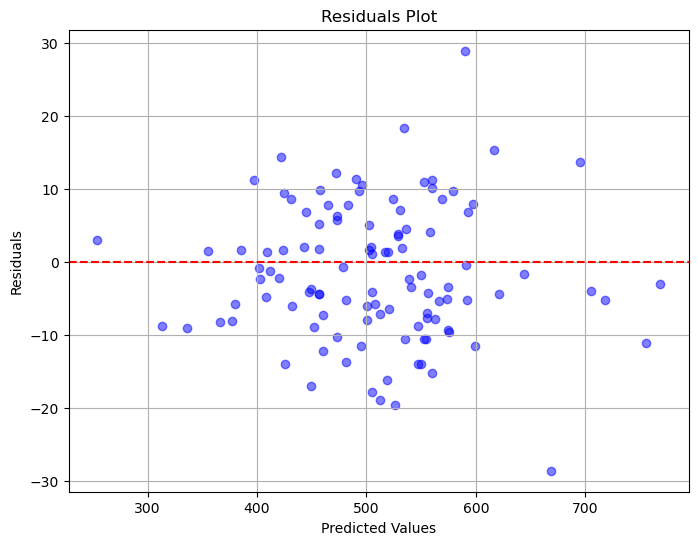

In [67]:
# Plot residuals
residuals = Y_test - y_pred_ann
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_ann, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()


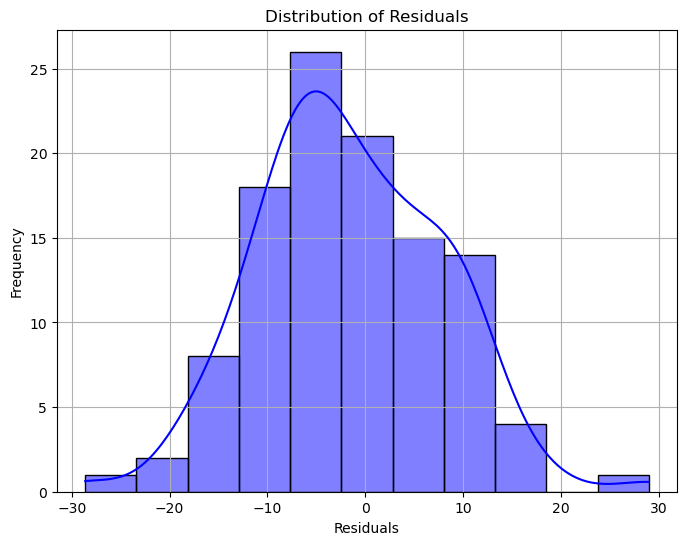

In [68]:
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='blue')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [74]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(lr,open('pipe2.pkl','wb'))

In [75]:
import  joblib

In [76]:
model = joblib.load('pipe2.pkl')

In [77]:
model

LinearRegression()

In [53]:
X

ASL        TOA        TOW       LOM
0    34.497268  12.655651  39.577668  4.082621
1    31.926272  11.109461  37.268959  2.664034
2    33.000915  11.330278  37.110597  4.104543
3    34.305557  13.717514  36.721283  3.120179
4    33.330673  12.795189  37.536653  4.446308
..         ...        ...        ...       ...
495  33.237660  13.566160  36.417985  3.746573
496  34.702529  11.695736  37.190268  3.576526
497  32.646777  11.499409  38.332576  4.958264
498  33.322501  12.391423  36.840086  2.336485
499  33.715981  12.418808  35.771016  2.735160

[500 rows x 4 columns]

In [54]:
X.to_csv('traineddata.csv',index=None)

In [61]:
df.describe()

Avg Session Length  Time on App  Time on Website  Length of Membership  \
count          500.000000   500.000000       500.000000            500.000000   
mean            33.053194    12.052488        37.060445              3.533462   
std              0.992563     0.994216         1.010489              0.999278   
min             29.532429     8.508152        33.913847              0.269901   
25%             32.341822    11.388153        36.349257              2.930450   
50%             33.082008    11.983231        37.069367              3.533975   
75%             33.711985    12.753850        37.716432              4.126502   
max             36.139662    15.126994        40.005182              6.922689   

       Yearly Amount Spent  
count           500.000000  
mean            499.314038  
std              79.314782  
min             256.670582  
25%             445.038277  
50%             498.887875  
75%             549.313828  
max             765.518462

In [60]:
df

Avg Session Length  Time on App  Time on Website  Length of Membership  \
0             34.497268    12.655651        39.577668              4.082621   
1             31.926272    11.109461        37.268959              2.664034   
2             33.000915    11.330278        37.110597              4.104543   
3             34.305557    13.717514        36.721283              3.120179   
4             33.330673    12.795189        37.536653              4.446308   
..                  ...          ...              ...                   ...   
495           33.237660    13.566160        36.417985              3.746573   
496           34.702529    11.695736        37.190268              3.576526   
497           32.646777    11.499409        38.332576              4.958264   
498           33.322501    12.391423        36.840086              2.336485   
499           33.715981    12.418808        35.771016              2.735160   

     Yearly Amount Spent  
0             587.951054  
1             392.204933  
2             487.547505  
3             581.852344  
4             599.406092  
..                   ...  
495           573.847438  
496           529.049004  
497           551.620145  
498           456.469510  
499           497.778642  

[500 rows x 5 columns]

# AutoML

In [51]:
import h2o
from h2o.automl import H2OAutoML


h2o.init()


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM (Temurin)(build 25.302-b08, mixed mode)
  Starting server from C:\Users\HP PAVILION\AppData\Roaming\Python\Python311\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\HPPAVI~1\AppData\Local\Temp\tmpg6t40zf3
  JVM stdout: C:\Users\HPPAVI~1\AppData\Local\Temp\tmpg6t40zf3\h2o_HP_PAVILION_started_from_python.out
  JVM stderr: C:\Users\HPPAVI~1\AppData\Local\Temp\tmpg6t40zf3\h2o_HP_PAVILION_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  ----------------------------------
H2O_cluster_uptime:         03 secs
H2O_cluster_timezone:       Asia/Kolkata
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.44.0.3
H2O_cluster_version_age:    2 months and 10 days
H2O_cluster_name:           H2O_from_python_HP_PAVILION_uf6o2l
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    1.716 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.11.3 final
--------------------------  ----------------------------------

In [52]:
h20_data = h2o.import_file('df1.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [53]:
aml = H2OAutoML(max_models=15,seed=42,sort_metric='mse')

In [54]:
train, test = h20_data.split_frame(ratios=[0.8],seed=42)

In [55]:
features = ['ASL', 'TOA', 'TOW', 'LOM']
target = 'YAS'

In [56]:
aml.train(x = features, y = target, training_frame = train)

AutoML progress: |
20:57:16.563: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_1_AutoML_1_20240301_205716


GLM Model: summary
    family    link      regularization               lambda_search                                                                   number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ---------------------------  ------------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  -----------------------------------------------
    gaussian  identity  Ridge ( lambda = 0.006736 )  nlambda = 30, lambda.max = 6736.2, lambda.min = 0.006736, lambda.1se = 0.01747  4                             4                              30                      AutoML_1_20240301_205716_training_py_2_sid_8359

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 97.44735155237211
RMSE: 9.87154251129843
MAE: 7.808699575716835
RMSLE: 0.020434976605454243
Mean Residual Deviance: 97.44735155237211
R^2: 0.9854107562040786
Null degrees of freedom: 389
Residual degrees of freedom: 385
Null deviance: 2604964.83827712
Residual deviance: 38004.46710542512
AIC: 2904.703832651492

ModelMetricsRegressionGLM: glm
** Reported on cross-validation data. **

MSE: 100.37022611113952
RMSE: 10.018494203778307
MAE: 7.927476457907242
RMSLE: 0.020764634606497336
Mean Residual Deviance: 100.37022611113952
R^2: 0.9849731606322814
Null degrees of freedom: 389
Residual degrees of freedom: 385
Null deviance: 2618218.0428176112
Residual deviance: 39144.38818334441
AIC: 2916.22964403337

Cross-Validation Metrics Summary: 
                        mean       sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ---------  ----------  ------------  ------------  ------------  ------------  ------------
mae                     7.9108     0.204292    7.81312       7.94235       8.11772       8.06807       7.61272
mean_residual_deviance  100.046    6.92775     100.162       107.939       104.636       97.5727       89.9226
mse                     100.046    6.92775     100.162       107.939       104.636       97.5727       89.9226
null_deviance           523644     113235      624604        503776        654357        442072        393408
r2                      0.984458   0.00259035  0.987031      0.982969      0.987514      0.982615      0.982164
residual_deviance       7803.61    540.364     7812.63       8419.23       8161.58       7610.67       7013.96
rmse                    9.99745    0.348784    10.0081       10.3894       10.2292       9.87789       9.48275
rmsle                   0.0207265  0.00100074  0.0206787     0.0220041     0.0214319     0.0197824     0.0197353

Scoring History: 
     timestamp            duration    iteration    lambda    predictors    deviance_train      deviance_xval       deviance_se         alpha    iterations    training_rmse     training_deviance    training_mae       training_r2
---  -------------------  ----------  -----------  --------  ------------  ------------------  ------------------  ------------------  -------  ------------  ----------------  -------------------  -----------------  ------------------
     2024-03-01 20:57:17  0.000 sec   1            .67E4     5             6677.332989046933   6711.7369839864505  649.0847860333322   0.0
     2024-03-01 20:57:17  0.001 sec   2            .42E4     5             6676.07393443466    6710.734932378293   648.9922024109884   0.0
     2024-03-01 20:57:17  0.002 sec   3            .26E4     5             6674.047271725955   6709.121822990055   648.8431518562081   0.0
     2024-03-01 20:57:17  0.003 sec   4            .16E4     5             6670.78576804709    6706.525540766919   648.6032534349553   0.0
     2024-03-01 20:57:17  0.004 sec   5            .1E4      5             6665.538954624877   6702.34804961036   

In [57]:
m = aml.get_best_model()
m

Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_1_AutoML_1_20240301_205716


GLM Model: summary
    family    link      regularization               lambda_search                                                                   number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ---------------------------  ------------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  -----------------------------------------------
    gaussian  identity  Ridge ( lambda = 0.006736 )  nlambda = 30, lambda.max = 6736.2, lambda.min = 0.006736, lambda.1se = 0.01747  4                             4                              30                      AutoML_1_20240301_205716_training_py_2_sid_8359

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 97.44735155237211
RMSE: 9.87154251129843
MAE: 7.808699575716835
RMSLE: 0.020434976605454243
Mean Residual Deviance: 97.44735155237211
R^2: 0.9854107562040786
Null degrees of freedom: 389
Residual degrees of freedom: 385
Null deviance: 2604964.83827712
Residual deviance: 38004.46710542512
AIC: 2904.703832651492

ModelMetricsRegressionGLM: glm
** Reported on cross-validation data. **

MSE: 100.37022611113952
RMSE: 10.018494203778307
MAE: 7.927476457907242
RMSLE: 0.020764634606497336
Mean Residual Deviance: 100.37022611113952
R^2: 0.9849731606322814
Null degrees of freedom: 389
Residual degrees of freedom: 385
Null deviance: 2618218.0428176112
Residual deviance: 39144.38818334441
AIC: 2916.22964403337

Cross-Validation Metrics Summary: 
                        mean       sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ---------  ----------  ------------  ------------  ------------  ------------  ------------
mae                     7.9108     0.204292    7.81312       7.94235       8.11772       8.06807       7.61272
mean_residual_deviance  100.046    6.92775     100.162       107.939       104.636       97.5727       89.9226
mse                     100.046    6.92775     100.162       107.939       104.636       97.5727       89.9226
null_deviance           523644     113235      624604        503776        654357        442072        393408
r2                      0.984458   0.00259035  0.987031      0.982969      0.987514      0.982615      0.982164
residual_deviance       7803.61    540.364     7812.63       8419.23       8161.58       7610.67       7013.96
rmse                    9.99745    0.348784    10.0081       10.3894       10.2292       9.87789       9.48275
rmsle                   0.0207265  0.00100074  0.0206787     0.0220041     0.0214319     0.0197824     0.0197353

Scoring History: 
     timestamp            duration    iteration    lambda    predictors    deviance_train      deviance_xval       deviance_se         alpha    iterations    training_rmse     training_deviance    training_mae       training_r2
---  -------------------  ----------  -----------  --------  ------------  ------------------  ------------------  ------------------  -------  ------------  ----------------  -------------------  -----------------  ------------------
     2024-03-01 20:57:17  0.000 sec   1            .67E4     5             6677.332989046933   6711.7369839864505  649.0847860333322   0.0
     2024-03-01 20:57:17  0.001 sec   2            .42E4     5             6676.07393443466    6710.734932378293   648.9922024109884   0.0
     2024-03-01 20:57:17  0.002 sec   3            .26E4     5             6674.047271725955   6709.121822990055   648.8431518562081   0.0
     2024-03-01 20:57:17  0.003 sec   4            .16E4     5             6670.78576804709    6706.525540766919   648.6032534349553   0.0
     2024-03-01 20:57:17  0.004 sec   5            .1E4      5             6665.538954624877   6702.34804961036   

In [58]:
lb = h2o.automl.get_leaderboard(aml, extra_columns = "ALL")
lb

model_id                                                     mse     rmse       mae      rmsle    mean_residual_deviance    training_time_ms    predict_time_per_row_ms  algo
-------------------------------------------------------  -------  -------  --------  ---------  ------------------------  ------------------  -------------------------  ---------------
GLM_1_AutoML_1_20240301_205716                           100.37   10.0185   7.92748  0.0207646                   100.37                   56                   0.005753  GLM
StackedEnsemble_AllModels_1_AutoML_1_20240301_205716     101.371  10.0683   7.9673   0.0209605                   101.371                1060                   0.119171  StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_1_20240301_205716  101.424  10.0709   7.92388  0.0209017                   101.424                1125                   0.074689  StackedEnsemble
DeepLearning_grid_1_AutoML_1_20240301_205716_model_1     133.648  11.5606   9.15042  0.0247281                   133.648               16707                   0.107961  DeepLearning
DeepLearning_grid_2_AutoML_1_20240301_205716_model_1     180.664  13.4411  10.724    0.027765                    180.664               14529                   0.020344  DeepLearning
DeepLearning_grid_3_AutoML_1_20240301_205716_model_1     181.769  13.4822  10.4546   0.0289247                   181.769               17257                   0.050008  DeepLearning
GBM_2_AutoML_1_20240301_205716                           270.464  16.4458  12.2371   0.0361592                   270.464                 399                   0.053651  GBM
GBM_grid_1_AutoML_1_20240301_205716_model_2              290.065  17.0313  12.6956   0.0370662                   290.065                 253                   0.129556  GBM
GBM_4_AutoML_1_20240301_205716                           300.79   17.3433  12.791    0.0380598                   300.79                  340                   0.035192  GBM
GBM_3_AutoML_1_20240301_205716                           311.158  17.6397  13.2714   0.0386331                   311.158                 383                   0.052728  GBM
[17 rows x 9 columns]

C:\Users\HP PAVILION\AppData\Roaming\Python\Python311\site-packages\h2o\frame.py:1979: H2ODependencyWarning: converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above).
  warnings.warn("converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


<Axes: ylabel='model_id'>

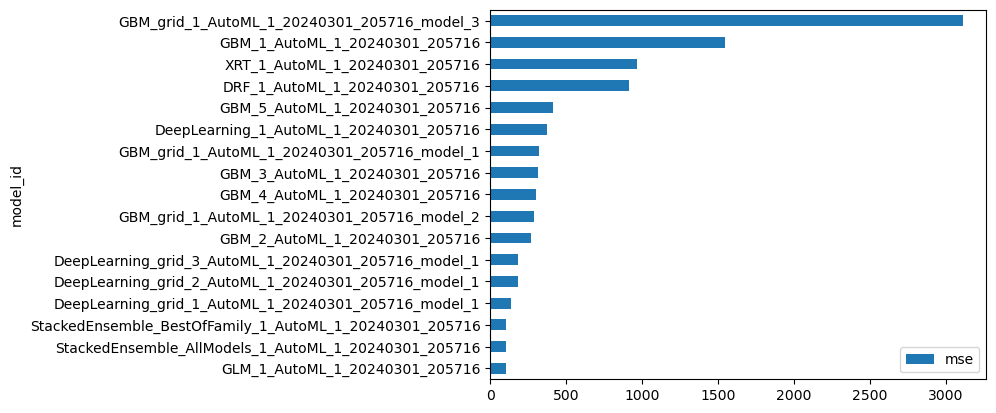

In [59]:
aml.leaderboard.as_data_frame().plot.barh(x='model_id', y='mse')


In [61]:
model = h2o.get_model('GLM_1_AutoML_1_20240301_205716')
model.model_performance(test)

ModelMetricsRegressionGLM: glm
** Reported on test data. **

MSE: 102.68360469168559
RMSE: 10.133291898079596
MAE: 8.109007466677049
RMSLE: 0.02092051938111799
Mean Residual Deviance: 102.68360469168559
R^2: 0.9788423150898224
Null degrees of freedom: 109
Residual degrees of freedom: 105
Null deviance: 534247.2889933661
Residual deviance: 11295.196516085414
AIC: 833.6482480657166

# Predictions on Test data

In [62]:
predictions = aml.leader.predict(test)

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [63]:
predicted_df = test.cbind(predictions)
predicted_df


C1      ASL      TOA      TOW      LOM      YAS    predict
----  -------  -------  -------  -------  -------  ---------
  10  33.9926  13.339   37.2258  2.48261  492.606    508.201
  14  32.388   13.1487  36.62    2.49454  470.453    460.2
  22  31.5316  13.3786  38.734   2.24515  436.516    432.726
  23  32.9033  11.6576  36.7726  3.9193   519.341    503.623
  31  33.4611  10.8692  35.6224  3.47141  447.688    459.54
  32  32.1755  13.3875  35.6942  4.34306  588.713    577.093
  45  34.5558  12.1705  39.1311  3.66311  549.861    551.06
  46  34.5646  13.1466  37.3354  3.87688  593.915    601.171
  51  33.9002  10.9568  37.2669  2.95267  442.667    443.046
  54  34.3902  12.6452  38.4683  2.8746   522.404    516.338
[110 rows x 7 columns]

In [64]:
predictions=predictions.as_data_frame()
test=test.as_data_frame()

C:\Users\HP PAVILION\AppData\Roaming\Python\Python311\site-packages\h2o\frame.py:1979: H2ODependencyWarning: converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above).
  warnings.warn("converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
C:\Users\HP PAVILION\AppData\Roaming\Python\Python311\site-packages\h2o\frame.py:1979: H2ODependencyWarning: converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above).
  warnings.warn("converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


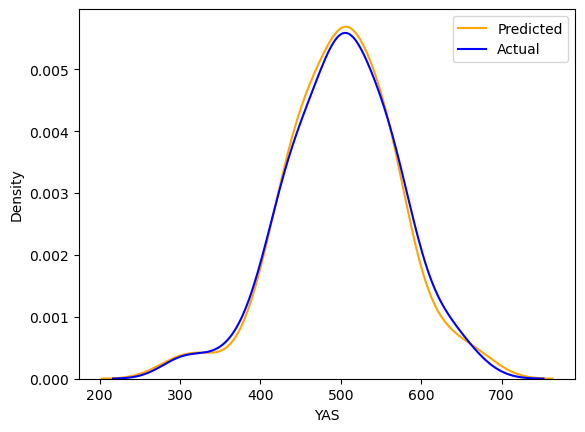

In [65]:
sns.distplot(predictions,hist=False,color='orange',label='Predicted')
sns.distplot(test['YAS'],hist=False,color='blue',label='Actual')
plt.legend()
plt.show()

In [66]:
!pip install pycaret

Defaulting to user installation because normal site-packages is not writeable
                                              0.0/485.9 kB ? eta -:--:--
     --                                      30.7/485.9 kB 1.3 MB/s eta 0:00:01
     ----                                  61.4/485.9 kB 544.7 kB/s eta 0:00:01
     -------                               92.2/485.9 kB 751.6 kB/s eta 0:00:01
     ----------                           143.4/485.9 kB 711.9 kB/s eta 0:00:01
     ----------------                     225.3/485.9 kB 981.9 kB/s eta 0:00:01
     ---------------------                286.7/485.9 kB 983.9 kB/s eta 0:00:01
     -------------------------------------  481.3/485.9 kB 1.5 MB/s eta 0:00:01
     -------------------------------------- 485.9/485.9 kB 1.5 MB/s eta 0:00:00
                                              0.0/160.5 kB ? eta -:--:--
     -------------------------------------- 160.5/160.5 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing met

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [52]:
import pycaret

In [69]:
from pycaret.regression import *
s = setup(df1, target = 'YAS', session_id = 123)

In [70]:
from pycaret.regression import RegressionExperiment
exp = RegressionExperiment()

In [71]:
exp = setup(df1, target='YAS', session_id=123)

In [74]:
best = compare_models()

In [190]:


#X_train.to_csv('Xtrain.csv')
#
#
#X_test.to_csv('Xtest.csv')
#
#
#X.to_csv('train.csv')
#
#
#Y.to_csv('test.csv')


In [130]:
train = h2o.import_file("Xtrain.csv")
test = h2o.import_file("Xtest.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [180]:
df1.to_csv('df1.csv')
df1

ASL        TOA        TOW       LOM         YAS
0    34.497268  12.655651  39.577668  4.082621  587.951054
1    31.926272  11.109461  37.268959  2.664034  392.204933
2    33.000915  11.330278  37.110597  4.104543  487.547505
3    34.305557  13.717514  36.721283  3.120179  581.852344
4    33.330673  12.795189  37.536653  4.446308  599.406092
..         ...        ...        ...       ...         ...
495  33.237660  13.566160  36.417985  3.746573  573.847438
496  34.702529  11.695736  37.190268  3.576526  529.049004
497  32.646777  11.499409  38.332576  4.958264  551.620145
498  33.322501  12.391423  36.840086  2.336485  456.469510
499  33.715981  12.418808  35.771016  2.735160  497.778642

[500 rows x 5 columns]

In [18]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]